# Prácticas con fijos lineales

Los siguientes ejercicios con imágenes se realizan en un archivo de Jupyter Notebook, usando Python 3.8 y las siguientes librerías, como se puede observar en los _imports_:
* `open-cv`
* `matplotlib`
* `numpy`

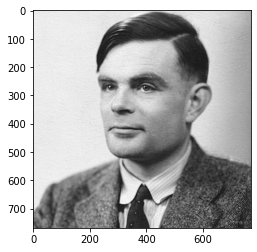

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2

image = cv2.imread('alan_turing.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, 'gray');
# imagen que se usará para aplicar los filtros:

## _Mean filtering_

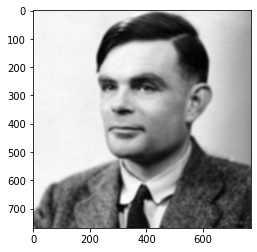

In [2]:
import cv2

# aplicar ventana de 10x10
mean3 = cv2.blur(image, (10, 10))
plt.imshow(mean3, 'gray');

## _Sharpening_

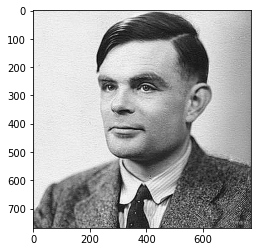

In [3]:
import numpy as np

kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])
sharpened = cv2.filter2D(image, -5, kernel)
plt.imshow(sharpened, 'gray');

# Algoritmo para detectar líneas

En el análisis automatizado de imágenes digitales, a menudo surgen problemas al detectar formas simples, como líneas rectas, círculos o elipses. En muchos casos, se puede utilizar un detector de bordes como preprocesamiento para obtener puntos o píxeles de la imagen que se encuentran en la curva deseada en el espacio de la imagen. Sin embargo, debido a imperfecciones en los datos de la imagen o en el detector de bordes, es posible que falten puntos o píxeles en las curvas deseadas, así como desviaciones espaciales entre la forma ideal y los puntos de borde ruidosos a medida que se obtienen del detector de bordes, por lo que es común agrupar los bordes extraídos en un conjunto apropiado de líneas, círculos o elipses.

La **transformada de Hough** aborda este problema haciendo posible realizar agrupaciones de los puntos de los bordes en candidatos a objetos mediante la realización de un procedimiento de votación explícito sobre un conjunto de objetos de imagen parametrizados. La transformada de Hough clásica se refería a la identificación de líneas en la imagen, pero más tarde se extendió para identificar posiciones de formas arbitrarias, más comúnmente círculos o elipses.

El caso más simple de la transformada de Hough es la detección de líneas rectas. En general, la línea recta $y = mx + b$ se puede representar como un punto $(b, m)$ en el espacio de parámetros. Sin embargo, las líneas verticales presentan un problema pues darían lugar a valores ilimitados para la pendiente $m$. Debido a esto y por razones computacionales, Duda y Hart propusieron el uso de la forma normal de Hesse:

$$r = x \cos{\theta} + y \sin{\theta}$$

donde $r$ es la distancia desde el origen al punto más cercano en la línea recta, y $θ$ es el ángulo entre el eje $x$ y la línea que conecta el origen con ese punto más cercano.

Ahora se puede asociar con cada línea de la imagen un par $(r, \theta)$. El plano $(r, \theta)$ se denomina *espacio de Hough* para el conjunto de líneas rectas en dos dimensiones. Dado un punto en el plano, el conjunto de todas las líneas rectas que atraviesan ese punto corresponde a una curva sinusoidal en el plano $(r, \theta)$, que es única para ese punto. Un conjunto de dos o más puntos que forman una línea recta producirá sinusoides que se cruzan en $(r, \theta)$ para esa línea. Por tanto, el problema de detectar puntos colineales se puede convertir en el problema de encontrar curvas concurrentes.

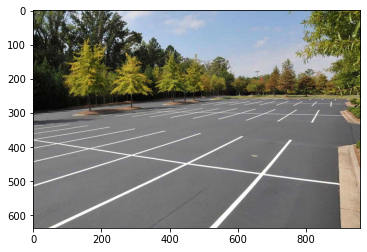

In [4]:
# leer imagen para detectar líneas
image = plt.imread('parking_lot.jpg')
plt.imshow(image);

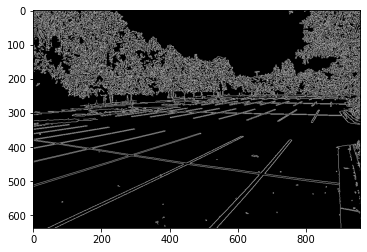

In [5]:
# convertir imagen a escala de grises
grayimage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# aplicar detección de bordes primero
edges = cv2.Canny(grayimage, 75, 150)
plt.imshow(edges, 'gray');

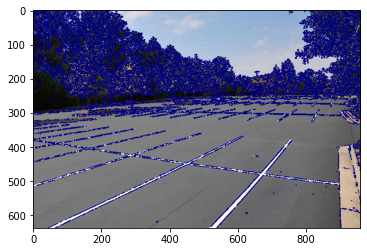

In [6]:
import math

# definir parámetros para transformada de Hough
rho = 1
theta = math.pi / 180
# aplicar transformada de Hough a bordes
lines = cv2.HoughLinesP(edges, rho, theta, 30)
# color de las líneas en RGB (azul en este caso)
color = (0, 0, 128)
# por cada línea detectada al aplicar la transformada de Hough
for line in lines:
    x1, y1, x2, y2 = line[0]
    # extraer punto inicial
    p1 = (x1, y1)
    # y punto final
    p2 = (x2, y2)
    # trazar línea sobre imagen de punto a punto
    cv2.line(image, p1, p2, color, 2)
plt.imshow(image);